In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Кластеризація

In [5]:
# Завантаження даних з файлів
data1 = pd.read_csv('/content/drive/MyDrive/IT/Python/GoIt/Data Scince/Homework_06_DS/data/data_2d.csv')
data2 = pd.read_csv('/content/drive/MyDrive/IT/Python/GoIt/Data Scince/Homework_06_DS/data/mnist.csv')

In [6]:
# Масштабування даних
scaler = StandardScaler()
scaled_data1 = scaler.fit_transform(data1)
scaled_data2 = scaler.fit_transform(data2)

In [7]:
# Застосування алгоритму K-means та визначення оптимальної кількості кластерів
wcss1 = []
wcss2 = []
k_values = range(1, 11)  # Кількість кластерів від 1 до 10

In [8]:
for k in k_values:
    # Кластеризація для файлу 1
    kmeans1 = KMeans(n_clusters=k, random_state=42)
    kmeans1.fit(scaled_data1)
    wcss1.append(kmeans1.inertia_)  # Внутрішньокластерна сума квадратів для файлу 1'
    
    # Кластеризація для файлу 2
    kmeans2 = KMeans(n_clusters=k, random_state=42)
    kmeans2.fit(scaled_data2)
    wcss2.append(kmeans2.inertia_)  # Внутрішньокластерна сума квадратів для файлу 2

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

# Візуалізація результатів

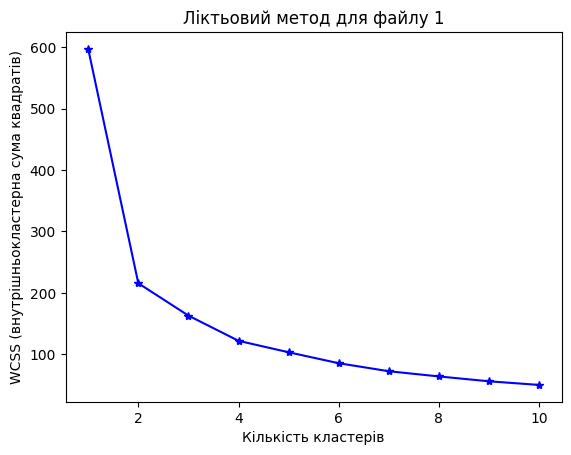

In [9]:
plt.plot(k_values, wcss1, 'b*-')
plt.xlabel('Кількість кластерів')
plt.ylabel('WCSS (внутрішньокластерна сума квадратів)')
plt.title('Ліктьовий метод для файлу 1')
plt.show()

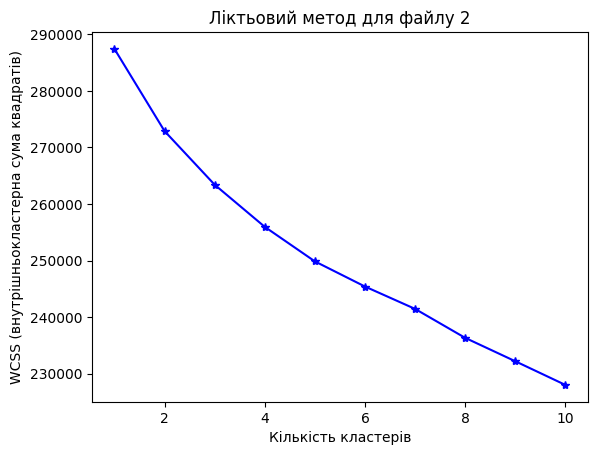

In [10]:
plt.plot(k_values, wcss2, 'b*-')
plt.xlabel('Кількість кластерів')
plt.ylabel('WCSS (внутрішньокластерна сума квадратів)')
plt.title('Ліктьовий метод для файлу 2')
plt.show()

# Вибір оптимальної кількості кластерів за ліктьовим методом

In [11]:
optimal_k1 = np.argmin(np.diff(wcss1)) + 1
print("Оптимальна кількість кластерів для файлу 1:", optimal_k1)
optimal_k2 = np.argmin(np.diff(wcss2)) + 1
print("Оптимальна кількість кластерів для файлу 2:", optimal_k2)

Оптимальна кількість кластерів для файлу 1: 1
Оптимальна кількість кластерів для файлу 2: 1


# Застосування алгоритму K-means з оптимальною кількістю кластерів

In [12]:
kmeans1 = KMeans(n_clusters=optimal_k1, random_state=42)
kmeans1.fit(scaled_data1)
clusters1 = kmeans1.predict(scaled_data1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
kmeans2 = KMeans(n_clusters=optimal_k2, random_state=42)
kmeans2.fit(scaled_data2)
clusters2 = kmeans2.predict(scaled_data2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Застосування PCA для зменшення розмірності до 2 вимірів

In [14]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(scaled_data2)

# Візуалізація результату роботи кластеризації

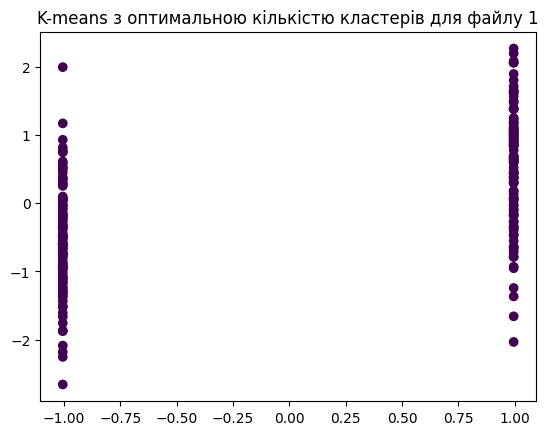

In [15]:
plt.scatter(scaled_data1[:, 0], scaled_data1[:, 1], c=clusters1)
plt.title('K-means з оптимальною кількістю кластерів для файлу 1')
plt.show()

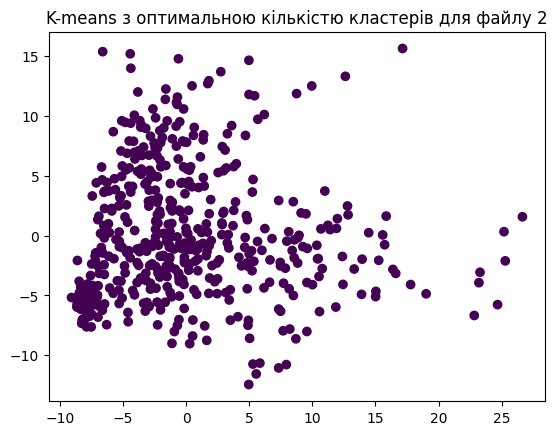

In [16]:
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters2)
plt.title('K-means з оптимальною кількістю кластерів для файлу 2')
plt.show()